In [1]:
#!pip install rebound astroquery astropy

import rebound
import numpy as np
import pandas as pd
from astroquery.jplhorizons import Horizons
from astropy.time import Time

In [2]:
initdate= "2011-01-01 00:00:00"

In [3]:
# --- PARAMETERS ---
JD_start = 2455562.5          # Your start epoch in Julian Date
JD_ref = 2451545.0            # J2000 reference epoch in JD
days_per_year = 365.25
# Convert JD_start to years relative to J2000
t0 = (JD_start - JD_ref) / days_per_year

In [4]:
# 2. Set up REBOUND simulation
sim = rebound.Simulation()
sim.units = ('AU', 'yr', 'Msun')
sim.integrator = "ias15"
sim.add("Sun", date=initdate)
# Add planets (using built-in Solar System at J2000)
for planet in ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]:
    sim.add(planet, date=initdate)
# Add asteroid from JPL initial condition
sim.add("Bennu", date=initdate)

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')
Searching NASA Horizons for 'Bennu'... 
Found: 101955 Bennu (1999 RQ36) (2101955) 


/home/nabillbox/.local/lib/python3.9/site-packages/rebound/horizons.py:181: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


In [5]:
sim.status()

---------------------------------
REBOUND version:     	4.4.8
REBOUND built on:    	Apr  2 2025 19:16:14
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x7e918311e9c0, m=0.9999999999950272 x=-0.004174498664102372 y=0.0007096704717781201 z=1.616851611621032e-05 vx=0.00030061881394943634 vy=-0.0022529731323473368 vz=-2.9618094175333046e-06>
<rebound.particle.Particle object at 0x7e918311eac0, m=1.6601208254808336e-07 x=-0.32542819578508925 y=0.14703743335583722 z=0.04144878699381018 vx=-6.374821166784023 vy=-8.917982266881609 vz=-0.1435022004571108>
<rebound.particle.Particle object at 0x7e918311e9c0, m=2.447838287784771e-06 x=-0.542283721769567 y=0.47531291375983165 z=0.03757383973277001 vx=-4.913693177205809 vy=-5.581005571025445 vz=0.20717170404381657>
<rebound.particle.Particle object at 0x7e918311eac0, m=3.0404326489511185e-06 x=-0.

In [6]:
# 3. Integration setup
n_outputs = 10000                     # Every 100 years for 1 million years
years_per_step = 100
total_time = n_outputs * years_per_step
times = t0 + np.arange(n_outputs) * years_per_step
elements = []

In [7]:
# 4. Integrate and collect orbital elements
for t in times:
    sim.integrate(t)
    orbit = sim.particles[-1]
    jd = JD_ref + t * days_per_year
    calendar_date = Time(jd, format='jd').iso.split()[0]  # 'YYYY-MM-DD'
    
    elements.append([
    t,
    jd,
    calendar_date,
    orbit.a,
    orbit.e,
    np.degrees(orbit.inc),
    np.degrees(orbit.Omega),
    np.degrees(orbit.omega),
    np.degrees(orbit.M)
])

/home/nabillbox/.local/lib/python3.9/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


In [8]:
# 5. Save to CSV
df = pd.DataFrame(elements, columns=["Time (yr since J2000)", "Julian Date", "Calendar Date", "a (AU)", "e", "i (deg)", "Omega (deg)", "omega (deg)", "M (deg)"])
df.to_csv("rbd_bennu_orbit_1Myr.csv", index=False)
print("✅ Simulation complete. Data saved to rbd_asteroid_orbit_1Myr.csv")

✅ Simulation complete. Data saved to rbd_asteroid_orbit_1Myr.csv


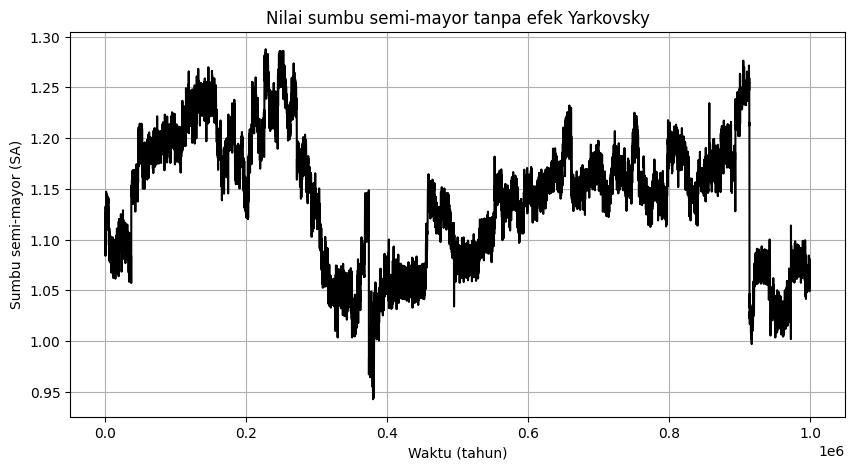

In [11]:
# DECLARE DATA NON YARKOVSKY
import matplotlib.pyplot as plt
import pandas as pd
import numpy as py

data_non_yarkovsky = pd.read_csv('rbd_bennu_orbit_1Myr.csv')
df_rbd = pd.DataFrame(data_non_yarkovsky)

x_r = df_rbd['Time (yr since J2000)']
y_r = df_rbd['a (AU)']

plt.figure(figsize=(10, 5))
plt.plot(x_r,y_r,'k-') 
plt.xlabel('Waktu (tahun)')
plt.ylabel('Sumbu semi-mayor (SA)')
plt.grid(True)
plt.title('Nilai sumbu semi-mayor tanpa efek Yarkovsky')
plt.savefig("a tanpa yarkovsky", dpi=300)
plt.show()